<a href="https://colab.research.google.com/github/tincorpai/sklearn_projects/blob/master/ipl_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IPL Score Prediction using Deepleaning

In [ ]:
%cd '/content/drive/My Drive/Data_Science_Git/Transportation'


/content/drive/My Drive/Data_Science_Git/Transportation


In [ ]:
#import all important datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import keras
import tensorflow as tf


## Step 1 - Loading the Dataset


This dataset is generated from the cricket dataset that was downloaded from the cricket website. Its contains dataset from the year 2008 to 2017 respectively.

We imported the dataset using read_csv() function from pandas.

In [ ]:
ipl = pd.read_csv("ipl_data.csv")
ipl.head()


,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


### Dropping unimportant features

* We will drop some columns from the dataset. The columns dropped are not important to the prediction of the ipl score.

In [ ]:
ipl.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [ ]:
df_ipl = ipl.drop(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5','mid', 'striker', 'non-striker'], axis =1)
df_ipl.head()

,venue,bat_team,bowl_team,batsman,bowler,total
0,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,222
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
2,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
3,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
4,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222


### Further Pre-Processing

Next, split the dataset into the features dataset and the label dataset like this.

In [ ]:
X = df_ipl.drop(['total'], axis = 1)
y = df_ipl['total']
X.head()

,venue,bat_team,bowl_team,batsman,bowler
0,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar
2,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar
3,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar
4,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar


* Applied label encoding to the categorical features in X

* We have created separate labelEncoder to each categorical features and have encoded their values.

* In addition, we also created mapping to convert the encoded label back to their original values, which can be useful for interpreting the results.

In [ ]:
from sklearn.preprocessing import LabelEncoder

venue_encoder = LabelEncoder()
bat_encoder = LabelEncoder()
bowl_encoder = LabelEncoder()
stricker_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()


#Fits and transformed the categorical features with label encoding.
X['venue'] = venue_encoder.fit_transform(X['venue'])
X['bat_team'] = bat_encoder.fit_transform(X['bat_team'])
X['bowl_team'] = bowl_encoder.fit_transform(X['bowl_team'])
X['batsman'] = stricker_encoder.fit_transform(X['batsman'])
X['bowler'] = bowler_encoder.fit_transform(X['bowler'])

In [ ]:
X.head()

,venue,bat_team,bowl_team,batsman,bowler
0,14,6,12,328,201
1,14,6,12,61,201
2,14,6,12,61,201
3,14,6,12,61,201
4,14,6,12,61,201


## Train Test Split

The next step is to split the dataset into train and test dataset. The train dataset will contain 70% of dataset and 30% of the dataset respectively.

Furthermore, the following information is important to consider when performing a machine learning project

* X_train contains the training data for your input features

* X_test contains the testing data for your input features

* y_train contains the training data for your target feature

* y_test contains the testing data for your target feature

In [ ]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Feature Scaling

The next step under the pre-proceessing step is to perform feature scaling.

Feature scaling is important because deep learning perform efficiently when all features are under the same scale. In order to achieve this, we carry out the following feature scaling process:

* Perform min-max scaling on our input features to ensure all the features are on the same scale.

* Scaling is performed to ensure consistent scale to improve model performance.

* Scaling will transform both the testing and training dataset to improve the parameters.

 We will adopt the MinMaxScaler from sklearn.processing

In [ ]:
from sklearn.preprocessing import MinMaxScaler


#fit the scaler on the train and the test dataset
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Development

For the model development, we define the neural network using TensorFlow and Kerax for regression.

After defining the model, we compile the model, before training the model.

In [ ]:

# Define the neural network model
model = keras.Sequential([
    keras.layers.Input( shape=(X_train_scaled.shape[1],)),  # Input layer
    keras.layers.Dense(512, activation='relu'),  # Hidden layer with 512 units and ReLU activation
    keras.layers.Dense(216, activation='relu'),  # Hidden layer with 216 units and ReLU activation
    keras.layers.Dense(1, activation='linear')  # Output layer with linear activation for regression
])



In [ ]:
# Compile the model with Huber loss
huber_loss = tf.keras.losses.Huber(delta=1.0)  # You can adjust the 'delta' parameter as needed
model.compile(optimizer='adam', loss=huber_loss)  # Use Huber loss for regression

Step 5 - Training the Model

In [ ]:
model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_data=(X_test_scaled, y_test))

Epoch 1/50
832/832 [==============================] - 7s 7ms/step - loss: 32.3602 - val_loss: 22.0791
Epoch 2/50
832/832 [==============================] - 5s 5ms/step - loss: 22.3424 - val_loss: 22.0696
Epoch 3/50
832/832 [==============================] - 6s 8ms/step - loss: 22.2733 - val_loss: 22.2735
Epoch 4/50
832/832 [==============================] - 5s 6ms/step - loss: 22.2379 - val_loss: 22.2917
Epoch 5/50
832/832 [==============================] - 5s 5ms/step - loss: 22.1794 - val_loss: 21.8538
Epoch 6/50
832/832 [==============================] - 7s 8ms/step - loss: 22.2020 - val_loss: 21.8080
Epoch 7/50
832/832 [==============================] - 5s 5ms/step - loss: 22.1154 - val_loss: 22.5130
Epoch 8/50
832/832 [==============================] - 5s 5ms/step - loss: 22.1328 - val_loss: 22.2849
Epoch 9/50
832/832 [==============================] - 7s 9ms/step - loss: 22.1041 - val_loss: 21.7601
Epoch 10/50
832/832 [==============================] - 4s 5ms/step - loss: 22.0813

During the training process, the training loss and the validation loss is saved to our neural network and which will be plotted for visualization.

<Axes: >

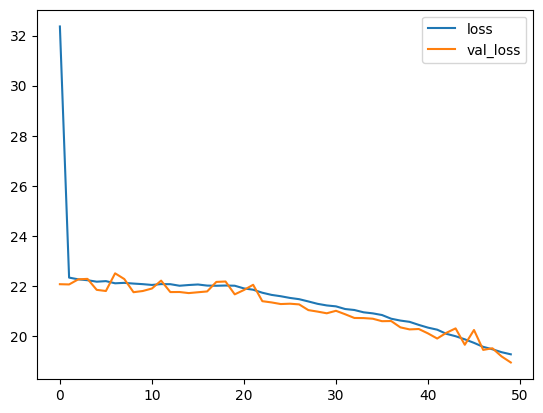

In [ ]:

model_losses = pd.DataFrame(model.history.history)
model_losses.plot()


## Step 6 - Model Evaluation

For the model evaluation step, we will do the following:

*  Predict the testing label using the trained dataset

*  We will evaluate the model performance by comparing the predicted value to the true value using the metric called the mean square error.

In [ ]:
# Make predictions
from sklearn.metrics import mean_absolute_error,mean_squared_error
predictions = model.predict(X_test_scaled)
mean_absolute_error(y_test, predictions)

713/713 [==============================] - 2s 2ms/step


19.447026417302972

## Step 7 - Create an interactive web application


   *  We have created an interactive widget using ipywidgets to predict the     score based on user input for venue, batting team, bowling team, striker, and bowler

   *  We have created dropdown widgets to select values for venue, batting team, bowling team, striker, and bowler.

   *  Then, we have added a “Predicted Score” button widget. Whenever, the button will be clicked, the predict_score function will be called and then perform the following steps:

       *  Decodes the user-selected values to their original categorical values.
       *  Encodes and scales these values to match the format used in model training.
       *  Uses the trained model to make a prediction based on the user’s input.
       *  Displays the predicted score.



In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output


import warnings
warnings.filterwarnings("ignore")

venue = widgets.Dropdown(options=df_ipl['venue'].unique().tolist(),description='Select Venue:')
batting_team = widgets.Dropdown(options =df_ipl['bat_team'].unique().tolist(),  description='Select Batting Team:')
bowling_team = widgets.Dropdown(options=df_ipl['bowl_team'].unique().tolist(),  description='Select Batting Team:')
striker = widgets.Dropdown(options=df_ipl['batsman'].unique().tolist(), description='Select Striker:')
bowler = widgets.Dropdown(options=df_ipl['bowler'].unique().tolist(), description='Select Bowler:')

predict_button = widgets.Button(description="Predict Score")

def predict_score(b):
    with output:
        clear_output()  # Clear the previous output


        # Decode the encoded values back to their original values
        decoded_venue = venue_encoder.transform([venue.value])
        decoded_batting_team = bat_encoder.transform([batting_team.value])
        decoded_bowling_team = bowl_encoder.transform([bowling_team.value])
        decoded_striker = stricker_encoder.transform([striker.value])
        decoded_bowler = bowler_encoder.transform([bowler.value])


        input = np.array([decoded_venue,  decoded_batting_team, decoded_bowling_team,decoded_striker, decoded_bowler])
        input = input.reshape(1,5)
        input = scaler.transform(input)
        #print(input)
        predicted_score = model.predict(input)
        predicted_score = int(predicted_score[0,0])

        print(predicted_score)

The widget-based interface allows you to interactively predict the score for specific match scenarios. Now, we have set up the button to trigger the predict_score function when clicked and display the widgets for venue, batting team , bowling team, striker and bowler.

In [ ]:
predict_button.on_click(predict_score)
output = widgets.Output()
display(venue, batting_team, bowling_team, striker, bowler, predict_button, output)


Dropdown(description='Select Venue:', options=('M Chinnaswamy Stadium', 'Punjab Cricket Association Stadium, M…

Dropdown(description='Select Batting Team:', options=('Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasth…

Dropdown(description='Select Batting Team:', options=('Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi…

Dropdown(description='Select Striker:', options=('SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey', 'Moha…

Dropdown(description='Select Bowler:', options=('P Kumar', 'Z Khan', 'AA Noffke', 'JH Kallis', 'SB Joshi', 'CL…

Button(description='Predict Score', style=ButtonStyle())

Output()

We have predicted the score of the match between CSK and King XI Punjab in Punjab Cricket Stadium. The predicted score of the match is 183.

By harnessing the power of ML and DL, we have successfully predicted the cricket scores based on historical data. The model’s ability to predict cricket scores can be a valuable asset for IPL enthusiasts, teams, and analysts. It can provide insights into the dynamics of a match and help anticipate how different factors impact the final score.